In [28]:
import findspark

In [29]:
findspark.init('C:/Users/HP/Desktop/spark/spark-2.4.3-bin-hadoop2.7')

In [30]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [31]:
sc = SparkContext()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-18-2dfc28fca47d>:1 

In [19]:
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)

In [27]:
socket_stream = ssc.socketTextStream("127.0.0.1", 5555)

Py4JJavaError: An error occurred while calling o3389.socketTextStream.
: java.lang.IllegalStateException: Adding new inputs, transformations, and output operations after stopping a context is not supported
	at org.apache.spark.streaming.dstream.DStream.validateAtInit(DStream.scala:228)
	at org.apache.spark.streaming.dstream.DStream.<init>(DStream.scala:66)
	at org.apache.spark.streaming.dstream.InputDStream.<init>(InputDStream.scala:45)
	at org.apache.spark.streaming.dstream.ReceiverInputDStream.<init>(ReceiverInputDStream.scala:42)
	at org.apache.spark.streaming.dstream.SocketInputDStream.<init>(SocketInputDStream.scala:40)
	at org.apache.spark.streaming.StreamingContext.socketStream(StreamingContext.scala:322)
	at org.apache.spark.streaming.StreamingContext$$anonfun$socketTextStream$1.apply(StreamingContext.scala:303)
	at org.apache.spark.streaming.StreamingContext$$anonfun$socketTextStream$1.apply(StreamingContext.scala:303)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.streaming.StreamingContext.withNamedScope(StreamingContext.scala:274)
	at org.apache.spark.streaming.StreamingContext.socketTextStream(StreamingContext.scala:302)
	at org.apache.spark.streaming.api.java.JavaStreamingContext.socketTextStream(JavaStreamingContext.scala:168)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)


In [21]:
lines = socket_stream.window( 20 )

In [22]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [26]:
( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts Them in a DF
  .limit(10).registerTempTable("tweets") ) ) # Registers to a table.

Py4JJavaError: An error occurred while calling None.org.apache.spark.streaming.api.python.PythonTransformedDStream.
: java.lang.IllegalStateException: Adding new inputs, transformations, and output operations after stopping a context is not supported
	at org.apache.spark.streaming.dstream.DStream.validateAtInit(DStream.scala:228)
	at org.apache.spark.streaming.dstream.DStream.<init>(DStream.scala:66)
	at org.apache.spark.streaming.api.python.PythonDStream.<init>(PythonDStream.scala:224)
	at org.apache.spark.streaming.api.python.PythonTransformedDStream.<init>(PythonDStream.scala:241)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(Unknown Source)
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)
	at java.lang.reflect.Constructor.newInstance(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:238)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)


In [1]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
# Only works for Jupyter Notebooks!
%matplotlib inline

In [25]:
ssc.start()

Py4JJavaError: An error occurred while calling o3389.start.
: java.lang.IllegalStateException: StreamingContext has already been stopped
	at org.apache.spark.streaming.StreamingContext.start(StreamingContext.scala:608)
	at org.apache.spark.streaming.api.java.JavaStreamingContext.start(JavaStreamingContext.scala:556)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)


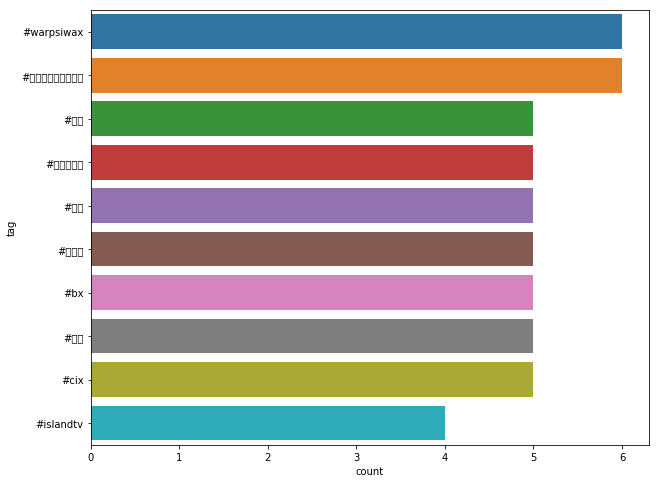

In [13]:
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

In [14]:
ssc.stop()